In [27]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import re
sns.set()

In [28]:
# Read in comMU metadata
comMU_meta = pd.read_csv('../data/dataset/commu_meta_desc.csv', index_col=0)
comMU_meta.head()

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id,description,description_list,caption_list
Unnamed: 0,,,,,,,,,,,,,,,,,
342,"['c', ' major']","[['Dm7', 'Dm7', 'Dm7', 'Dm7', 'Gsus4', 'Gsus4'...",['mid high'],8,65,new age,['main melody'],['acoustic piano'],standard,4-Apr,33,40,train,commu00343,"""Whispers of Lucid Skies""\nTraversing ethereal...",whispers of lucid skies traversing ethereal re...,"c, major, mid high, main melody, new age, aco..."
7279,"['c', ' major']","[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F',...",['mid high'],8,90,cinematic,['main melody'],['vibraphone'],standard,4-Apr,56,70,train,commu07280,"""An enchanting symphony of soaring dreams, whe...",an enchanting symphony of soaring dreams where...,"c, major, mid high, main melody, cinematic, v..."
2734,"['c', ' major']","[['C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'Am7...",['mid'],4,100,new age,['pad'],['acoustic piano'],standard,4-Apr,33,42,train,commu02735,"""Uncharted Melody: A harmonious journey throug...",uncharted melody a harmonious journey through ...,"c, major, mid, pad, new age, acoustic piano"
6178,"['a', ' minor']","[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",['mid'],8,70,new age,['pad'],['synth pad'],standard,4-Apr,81,82,train,commu06179,"""Whispers of Shadows: A Melody's Dance in the ...",whispers of shadows a melodys dance in the twi...,"a, minor, mid, pad, new age, synth pad"
3041,"['a', ' minor']","[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",['mid'],8,85,cinematic,['accompaniment'],['string ensemble'],standard,4-Apr,63,124,train,commu03042,"""Whispers of Shadows"" - A haunting symphony, w...",whispers of shadows a haunting symphony where ...,"a, minor, mid, accompaniment, cinematic, stri..."


# EDA on comMU Meta

<Figure size 432x288 with 0 Axes>

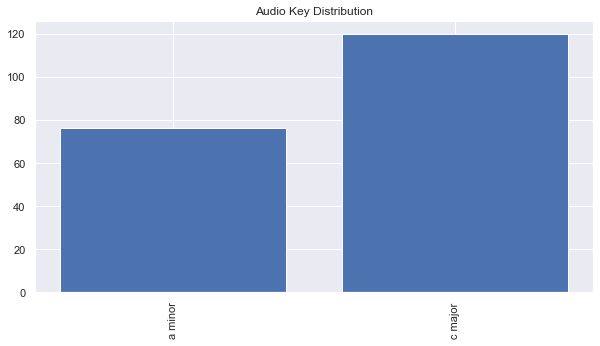

In [17]:

# audio key
audio_key = comMU_meta.groupby('audio_key').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(audio_key.index, audio_key['id'])
plt.xticks(rotation=90)
plt.title('Audio Key Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

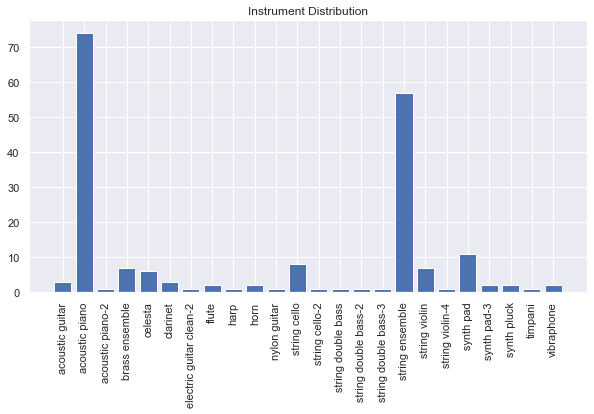

In [18]:
# instrument
inst = comMU_meta.groupby('inst').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(inst.index, inst['id'])
plt.xticks(rotation=90)
plt.title('Instrument Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

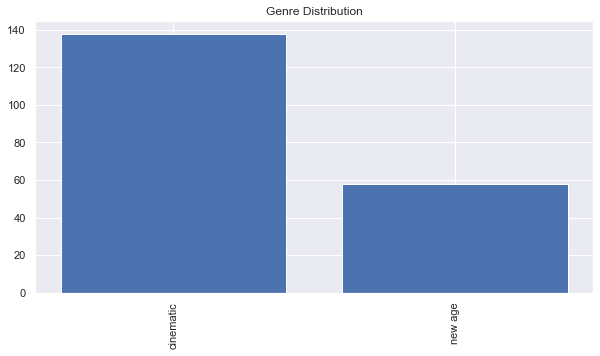

In [19]:
# genre 

genre = comMU_meta.groupby(['genre']).count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(genre.index, genre['id'])
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()


<Figure size 432x288 with 0 Axes>

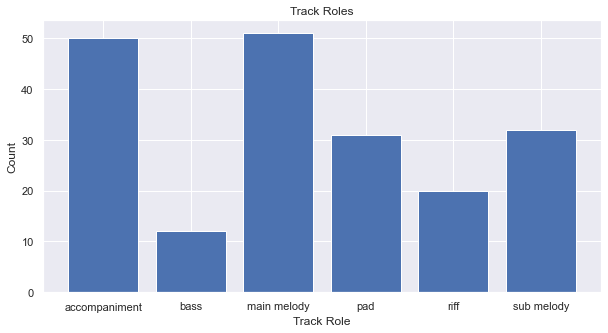

In [20]:
# EDA on comMU metadata
track_roles = comMU_meta.groupby('track_role').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(track_roles.index, track_roles['id'])
plt.title('Track Roles')
plt.xlabel('Track Role')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

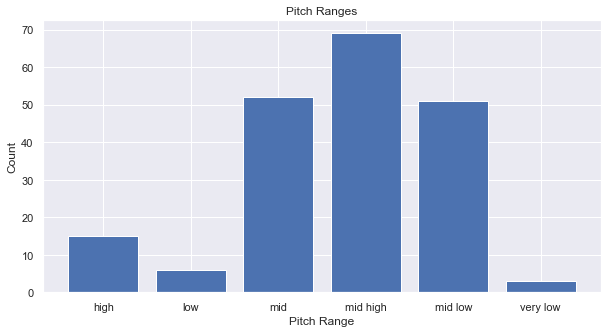

In [21]:
# pitch ranges
pitch_ranges = comMU_meta.groupby('pitch_range').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(pitch_ranges.index, pitch_ranges['id'])
plt.title('Pitch Ranges')
plt.xlabel('Pitch Range')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

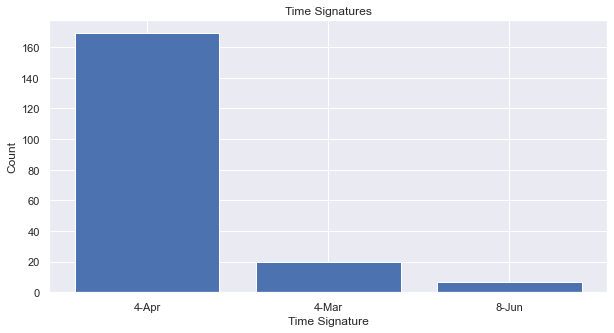

In [22]:
# time signatures
time_sigs = comMU_meta.groupby('time_signature').count()
plt.clf()
plt.figure(figsize=(10, 5))
plt.bar(time_sigs.index, time_sigs['id'])
plt.title('Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()


# Design of the Encoding
[audio key, pitch_range, num_measures, bmp, genre, inst]

In [23]:
# encode [audio key, pitch_range, track role, genre, inst] columns to numeric
# simple case create the word vector using the above columns

# split audio key into note and mode
comMU_meta['audio_key'] = comMU_meta['audio_key'].apply(lambda x: [x[0], x[1:]])

# split pitch range by hyphen
comMU_meta['pitch_range'] = comMU_meta['pitch_range'].apply(lambda x: x.split('_'))

# split track role by hyphen
comMU_meta['track_role'] = comMU_meta['track_role'].apply(lambda x: x.split('_'))

# split instrument by hyphen
comMU_meta['inst'] = comMU_meta['inst'].apply(lambda x: x.replace("-", "_").split('_'))




In [25]:
# clean uneccessary characters from description
# also remove new line characters and replace with space
comMU_meta['description_list'] = comMU_meta['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
comMU_meta['description_list'] = comMU_meta['description_list'].apply(lambda x: x.replace('\n', ' '))
comMU_meta['description_list'] = comMU_meta['description_list'].apply(lambda x: x.replace('\r', ' '))
comMU_meta['description_list'] = comMU_meta['description_list'].apply(lambda x: x.replace('\t', ' '))
comMU_meta['description_list'] = comMU_meta['description_list'].apply(lambda x: x.replace('  ', ' '))
comMU_meta['description_list'] = comMU_meta['description_list'].apply(lambda x: x.lower())
comMU_meta


,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id,description,description_list
Unnamed: 0,,,,,,,,,,,,,,,,
342,"[c, major]","[['Dm7', 'Dm7', 'Dm7', 'Dm7', 'Gsus4', 'Gsus4'...",[mid high],8,65,new age,[main melody],[acoustic piano],standard,4-Apr,33,40,train,commu00343,"""Whispers of Lucid Skies""\nTraversing ethereal...",whispers of lucid skies traversing ethereal re...
7279,"[c, major]","[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F',...",[mid high],8,90,cinematic,[main melody],[vibraphone],standard,4-Apr,56,70,train,commu07280,"""An enchanting symphony of soaring dreams, whe...",an enchanting symphony of soaring dreams where...
2734,"[c, major]","[['C', 'C', 'C', 'C', 'G', 'G', 'G', 'G', 'Am7...",[mid],4,100,new age,[pad],[acoustic piano],standard,4-Apr,33,42,train,commu02735,"""Uncharted Melody: A harmonious journey throug...",uncharted melody a harmonious journey through ...
6178,"[a, minor]","[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",[mid],8,70,new age,[pad],[synth pad],standard,4-Apr,81,82,train,commu06179,"""Whispers of Shadows: A Melody's Dance in the ...",whispers of shadows a melodys dance in the twi...
3041,"[a, minor]","[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",[mid],8,85,cinematic,[accompaniment],[string ensemble],standard,4-Apr,63,124,train,commu03042,"""Whispers of Shadows"" - A haunting symphony, w...",whispers of shadows a haunting symphony where ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,"[c, major]","[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm7...",[mid low],8,50,new age,[pad],[string ensemble],standard,4-Apr,81,82,train,commu05422,"""Melodic whispers under a starlit sky, embraci...",melodic whispers under a starlit sky embracing...
3259,"[a, minor]","[['Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'Dm7', 'D...",[mid high],8,80,cinematic,[sub melody],[acoustic piano],standard,4-Apr,38,56,train,commu03260,"""Whispers in Shadows: An Enchanting Melody Awa...",whispers in shadows an enchanting melody awake...
4716,"[c, major]","[['Cmaj7', 'Cmaj7', 'Cmaj7', 'Cmaj7', 'G', 'G'...",[high],8,80,cinematic,[sub melody],[acoustic piano],standard,4-Apr,31,58,train,commu04717,"""Whispers of cinematic dreams unfold, as a you...",whispers of cinematic dreams unfold as a young...


In [26]:
# combined to captioned list column. And expand the list of list
def expand_list(x):
    data = []
    for sublist in x:
        if type(sublist) == list:
            data.extend(sublist)
        else:
            data.append(sublist)
    return ', '.join(data)


comMU_meta['caption_list'] = comMU_meta[['audio_key','pitch_range', 'track_role', 'genre', 'inst']].values.tolist()
comMU_meta['caption_list'] = comMU_meta['caption_list'].apply(lambda x: expand_list(x))
comMU_meta.to_csv('../data/dataset/commu_meta_desc.csv')

In [16]:
# Process Chord Progression
# transform chord progression string to list

def chord_to_list(x):
    x = x.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
    return x

comMU_meta['chord_progressions_list'] = comMU_meta['chord_progressions'].apply(lambda x: chord_to_list(x))
comMU_meta['chord_progressions_length'] = comMU_meta['chord_progressions_list'].apply(lambda x: len(x))
comMU_meta

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id,chord_progressions_list,chord_progressions_length
0,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid,8,120,cinematic,main_melody,string_ensemble,standard,4-Apr,101,102,train,commu00001,"[Am, Am, Am, Am, Am, Am, Am, Am, C, C, C, C, C...",64
1,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_low,8,80,newage,accompaniment,acoustic_piano,standard,4-Apr,23,30,train,commu00002,"[C, C, C, C, C, C, C, C, Dm, Dm, Dm, Dm, Dm, D...",64
2,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,150,cinematic,riff,string_violin,standard,4-Apr,123,127,train,commu00003,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
3,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm'...",mid,8,110,cinematic,pad,choir,standard,4-Apr,45,46,train,commu00004,"[C, C, C, C, C, C, C, C, Gm, Gm, Gm, Gm, Gm, G...",64
4,aminor,"[['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'E...",mid_low,4,60,cinematic,pad,acoustic_piano,standard,4-Apr,21,22,train,commu00005,"[Am, Am, Am, Am, Em, Em, Em, Em, F, F, F, F, F...",32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,cmajor,"[['Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7',...",mid_high,8,110,cinematic,pad,synth_pad,standard,4-Apr,83,84,val,commu11140,"[Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fmaj7, Fma...",64
11140,cmajor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,110,cinematic,riff,acoustic_guitar,standard,4-Apr,51,55,val,commu11141,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
11141,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",very_low,8,145,cinematic,bass,string_ensemble,standard,4-Apr,109,112,val,commu11142,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
11142,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",low,8,140,cinematic,accompaniment,string_cello,standard,4-Apr,55,115,val,commu11143,"[Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, Am, A...",64
